In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from statistics import mode
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as ss
from scipy.stats import chi2_contingency 

import numpy as np


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
df = pd.read_csv('preply_final_final.csv')
df

,Unnamed: 0,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,0,60,264,5.0,0,0,0,0,10,19,...,0,0,0,0,0,0,1,4,1.0,0
1,1,110,1724,5.0,0,0,0,1,25,28,...,0,0,0,0,0,0,1,1,1.0,1
2,2,126,663,5.0,1,0,1,0,19,32,...,0,0,0,0,0,0,1,5,7.0,1
3,3,28,3,0.0,1,1,1,0,0,5,...,0,0,2,0,0,0,1,2,24.0,0
4,4,28,2,0.0,3,1,1,0,0,9,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,4012,22,3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,0
4013,4013,47,2,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,0
4014,4014,28,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,0
4015,4015,28,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,0


## Contingency table:
### The question asked is-
## Is there a relationship between the variables: "English" and "popular" ?

In [3]:
ct1=pd.crosstab(df['English'],df['popular'])
ct1

popular,0,1,2,3
English,,,,
5,325,19,2,6
6,643,53,8,12
7,2577,212,88,72


## conclusion: Yes, the greater the level of English, the higher the level of popularity. which make sense since students will prefer a teacher who knows the language well.

# Presentation in a bar graph- "English" and "popular" 

Text(0, 0.5, 'popular')

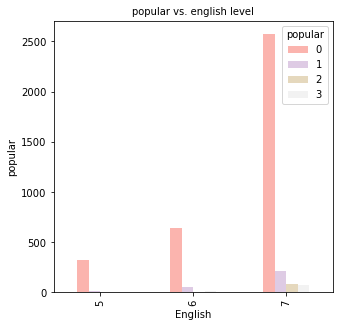

In [4]:
ct1.plot(kind='bar', figsize=(5,5),cmap='Pastel1' )
plt.title("popular vs. english level", fontsize=10)
plt.xlabel('English')
plt.ylabel('popular')

## conclusion: as we saw before the amount of populars teachers is getting bigger when the level of english is getting higher.

# Crosstab of the variables - "is_expensive" and "English"

In [5]:
ct2=pd.crosstab(df['is_expensive'],df['English'])
ct2

English,5,6,7
is_expensive,,,
0,350,690,2774
1,2,26,175


## conclusion: Lessons become more expensive as the student's knowledge of English grows

# Visualization of the connection between the variables - "is_expensive" and "English" 

Text(0, 0.5, 'is_expensive')

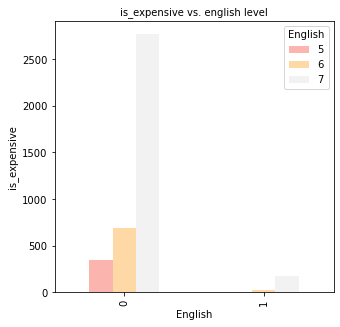

In [6]:
ct2.plot(kind='bar', figsize=(5,5),cmap='Pastel1' )
plt.title("is_expensive vs. english level", fontsize=10)
plt.xlabel('English')
plt.ylabel('is_expensive')

# A better look of the variable "newly_joined":

In [7]:
df['newly_joined'].value_counts(normalize='true')

0    0.689071
1    0.310929
Name: newly_joined, dtype: float64

# The ratio between "newly_joined" teachers and those who have experience on Preply on pie chart

0    2768
1    1249
Name: newly_joined, dtype: int64

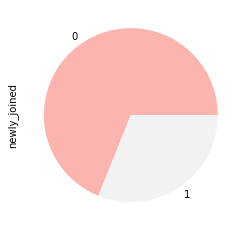

In [29]:
df['newly_joined'].value_counts().plot(kind='pie',cmap='Pastel1')
df['newly_joined'].value_counts()

In [30]:
(df['newly_joined'].value_counts()[1])/(df['newly_joined'].value_counts()[1]+df['newly_joined'].value_counts()[0])

0.3109285536470002

## conclusion: most of the people have experience on Preply and 30% are new.

# Ratio between teachers with a diploma and those without:

<AxesSubplot:ylabel='has_diploma'>

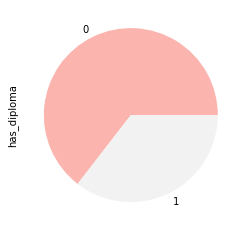

In [9]:
df['has_diploma'].value_counts().plot(kind='pie',cmap='Pastel1')

## conclusion: Most of the teachers on Preply web do no have a diploma.

# The ratio of teachers' English levels shown on pie chart: 

<AxesSubplot:ylabel='English'>

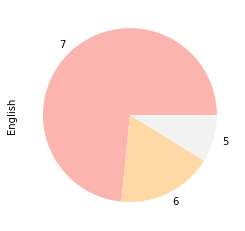

In [10]:
df['English'].value_counts().plot(kind='pie',cmap='Pastel1')

## conclusion: most of the English's teachers on preply web know well English.

# The ratio between teachers who take a high price compared to those who don't .

<AxesSubplot:ylabel='is_expensive'>

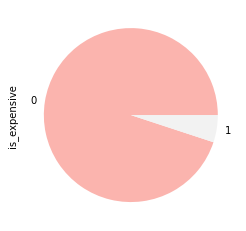

In [11]:
df['is_expensive'].value_counts().plot(kind='pie',cmap='Pastel1')

## better look of the "popular" column.

In [12]:
df['popular'].value_counts()

0    3545
1     284
2      98
3      90
Name: popular, dtype: int64

### conclusion: just a small part of the teacher called popular. Also the higher the level of popularity, the lower the amount of people who have it.

In [13]:
df1 = pd.DataFrame.from_dict(df['popular'].value_counts())
df1.index = df1.index.map(str)
df1.index = ['Not Popular','Popular','Very Popular','Super Popular']
df1

,popular
Not Popular,3545
Popular,284
Very Popular,98
Super Popular,90


# Classification by levels of the popularrity on pie chart

<AxesSubplot:ylabel='popular'>

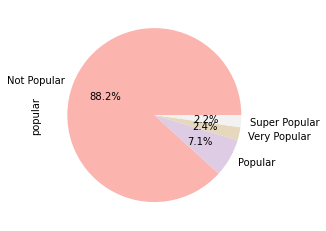

In [14]:
df['popular'].value_counts().plot(kind='pie',cmap='Pastel1',labels=df1.index,autopct='%1.1f%%',)

# Using appropriate graphs to display continuous variables 

## We built a fig object to display the graphs horizontally - "price" vs "lessons"

Text(0, 0.5, 'frequency')

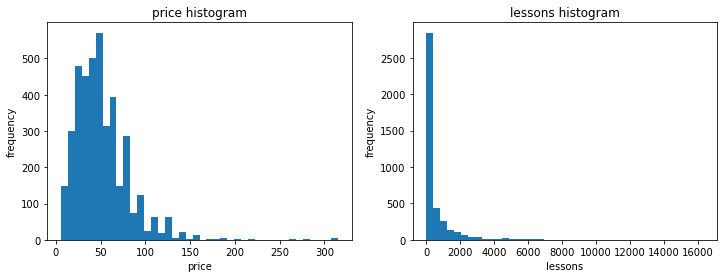

In [28]:
fig= plt.figure(figsize=(12,4))

fig1=fig.add_subplot(1,2,1)
fig2=fig.add_subplot(1,2,2)

fig1.hist(df.price,bins=40)
fig1.set_title("price histogram")
fig1.set_xlabel("price")
fig1.set_ylabel("frequency")

fig2.hist(df.lessons,bins=40)
fig2.set_title("lessons histogram")
fig2.set_xlabel("lessons")
fig2.set_ylabel("frequency")




## conclusion of price histogram: most of the teacher's lessons cost between 20-60 ils.
## conclusion of lessons histogram: most of the teacher have a low rate of lessons

# Boxplot - "English" and "reviews"
## Here we can see that the higher the level of English - the more reviews he gets

C:\Users\liors\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='English', ylabel='reviews'>

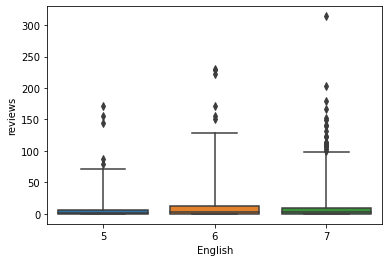

In [16]:
sns.boxplot(df.English,df.reviews,whis=10)

# Boxplot - "English" and "price"

C:\Users\liors\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='English', ylabel='price'>

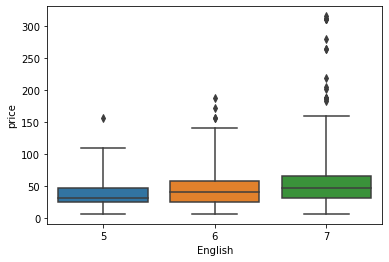

In [17]:
sns.boxplot(df.English,df.price,whis=3)

## conclusion: the higher the level of English - the higher the price is

## another visualization - violinplot - "English" and "price"

C:\Users\liors\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='English', ylabel='price'>

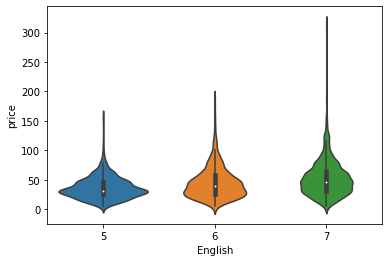

In [18]:
sns.violinplot(df.English,df.price,whis=3)


# Chi square test: 

## Checking the dependence between variables.
## helps us to check whether there is a relationship between the variables.
## our Null hypothesis: no dependence between the variables.


In [19]:
chi2_contingency(ct1)

(18.442030615267385,
 0.005217463274502861,
 6,
 array([[ 310.63978093,   24.88623351,    8.58750311,    7.88648245],
        [ 631.86955439,   50.62086134,   17.46776201,   16.04182226],
        [2602.49066468,  208.49290515,   71.94473488,   66.07169529]]))

## we can see that the chi value is very low- therefore our null hypothesis is wrong.
## what makes us understand that the values are depend on each other. 

####  pValue = 0.005217463274502861
#### pValue < = 0.05  

## ct1 is object , that distinguishes between "English" and "popular" levels .

# line graph
## represents the variables: "popular" vs 'is_expensive','lessons','reviews','students_count'

<AxesSubplot:xlabel='popular'>

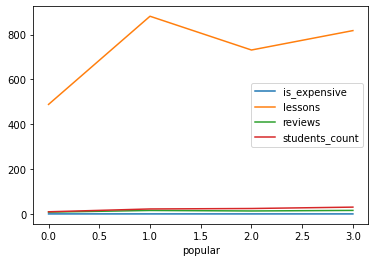

In [20]:
h=df.groupby(['popular']).mean()[['is_expensive','lessons','reviews','students_count']]
h.plot()

## conclusion: the popular has affect on the lessons variable and doesnt have an affect on the other variables

## "price" and "lessons" ar numerical variables
## "has_diploma" is are categorical variables

# scatter plot
## below we can see the "lessons" vs "price" showed on the axis - while those who have diploma are colored on red.

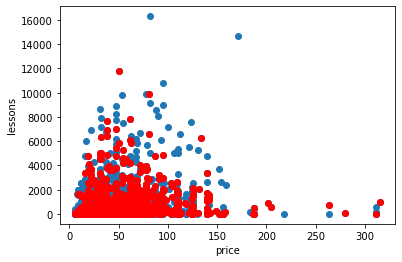

In [21]:
fig=plt.figure()
ax=plt.axes()
plt.scatter(df.price,df.lessons)
plt.xlabel("price")
plt.ylabel("lessons")
ax.scatter(df.price[df.has_diploma==1],df.lessons[df.has_diploma==1], c="red")
plt.show()

# Scatter plot
## In the following graph we can see our data presented in a multidimensional form. 

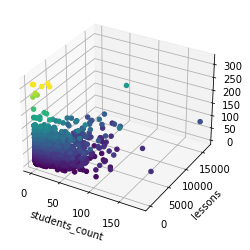

In [22]:
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
ax=plt.axes(projection="3d")

xdata=df.students_count
ydata=df.lessons
zdata=df.price

plt.xlabel("students_count")
plt.ylabel("lessons")
ax.scatter3D(xdata,ydata,zdata,c=zdata,depthshade=False)



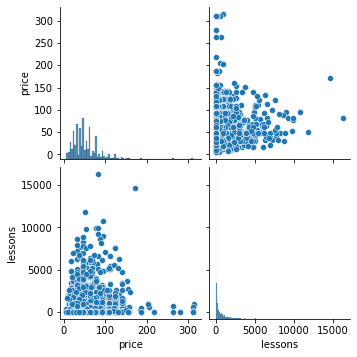

In [23]:
sns.pairplot(df[['price', 'lessons']])

## the next function were taken from:  

https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py

### we used it in order to see the correlation bestween the variables "lessons" and "price" 

### This example shows how to plot a confidence ellipse of a two-dimensional dataset, using its pearson correlation coefficient.
### about the "price" and "lessons" variable.

In [24]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

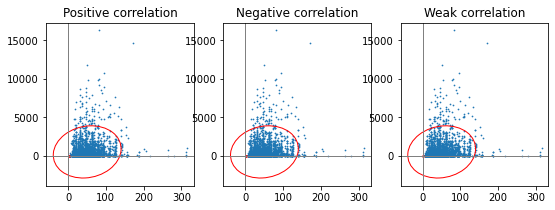

In [25]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x=df.price  #prices's column
    y=df.lessons #lesson's column
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

### The shape of the ellipse tells us the measure of the corellation - 
### If the slope tends to the right- it shows a strong correlation- and that is what we got.

## as can be seen on the graph below - most of the teachers take 50 ils for our.

<AxesSubplot:xlabel='price', ylabel='Density'>

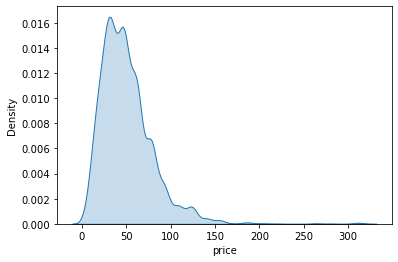

In [26]:
sns.kdeplot(df.price, shade=True)

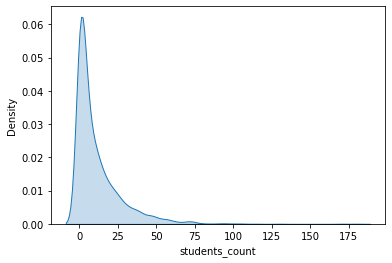

In [27]:
ax = sns.kdeplot(df.students_count, shade=True)


## most of the teachers on Preply web has about 15-20 students per teacher.